# PROJECT PROPOSAL GROUP 17

## Title/ Inferential Question

### Introduction

-insert intro here-
ie. What is the mean cholesterol level in men and women diagnosed with heart disease?


### Data Analysis

In [3]:
#Load this before continuing
library(tidyverse)
library(digest)
library(infer)
library(repr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
#Reading data into R
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland_heart <- read_csv(url)
head(cleveland_heart)

#Change column names to given varaibles from dataset

colnames(cleveland_heart) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol_level", "fasting_blood_sugar", "resting_ecg_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "major_vessels_colored", "thal", "diagnosis")
head(cleveland_heart)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


age,sex,chest_pain,resting_blood_pressure,cholesterol_level,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,major_vessels_colored,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


### Preliminary Results

In [19]:
cleveland_heart$sex <- as.character(cleveland_heart$sex)
cleveland_heart$sex[cleveland_heart$sex == "0"] <- "M"
cleveland_heart$sex[cleveland_heart$sex == "1"] <- "F"

prelim_tidy <- cleveland_heart %>%
    filter(!diagnosis == 0) %>%
    select(sex, cholesterol_level)

head(prelim_tidy)

sex,cholesterol_level
<chr>,<dbl>
F,286
F,229
M,268
F,254
F,203
F,256


*Table 1*

In [23]:
btsp <- prelim_tidy %>%
    specify(formula = cholesterol_level ~ sex) %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("M", "F"))

head(btsp)

replicate,stat
<int>,<dbl>
1,31.88291
2,23.19203
3,21.21509
4,10.13070
5,60.13732
6,44.55688


*Table 2*

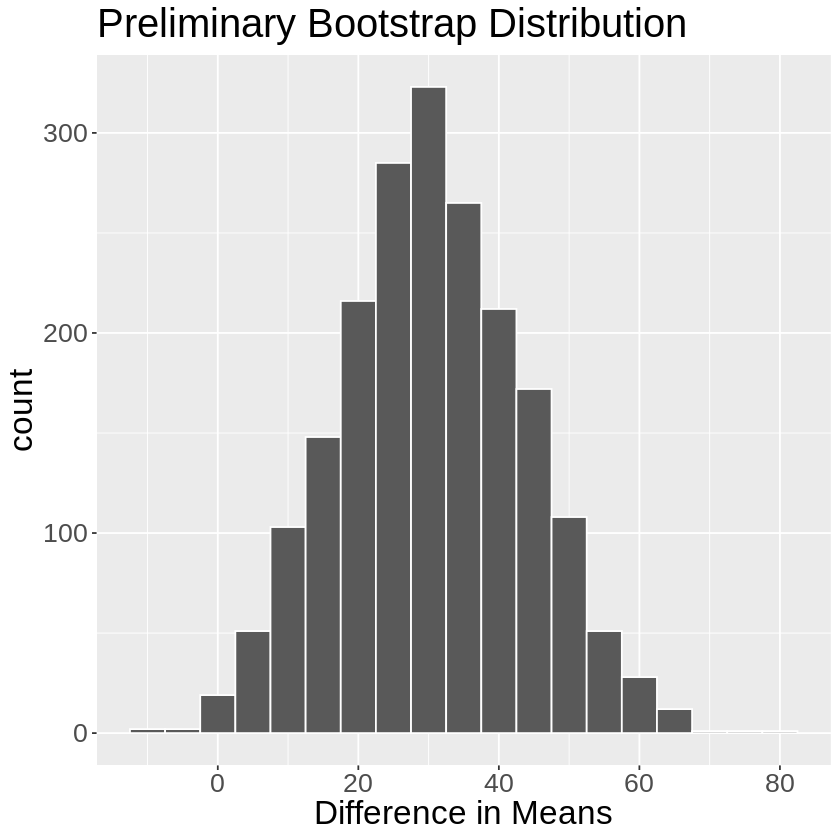

In [34]:
btsp_dist <- btsp %>%
    ggplot() +
        geom_histogram(aes(x = stat), binwidth = 5, color = "white") +
        ggtitle("Preliminary Bootstrap Distribution") +
        xlab("Difference in Means") +
        theme(text = element_text(size = 20))

btsp_dist

*Figure 1*

### Methods

-insert methods here-

We expect to find... similar mean cholesterol levels in both men and women

Impact: 

Future questions: 


### References

-insert 2 ref here-